In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from collections import OrderedDict

In [2]:
from platform import python_version
print(python_version())

3.6.6


### Create edgelist using events data

In [3]:
event_file = [item for item in os.listdir('../../data/protag_events_v2/') if 'txt' in item]

In [8]:
events_all = []
cnt = 0
for name in event_file:
    movie_events = []
    with open(os.path.join('../../data/protag_events_v2/', name), 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            line = line.split(' ')
            movie_events.append(line[1].split('-')[0])
        events_all.append(movie_events)


In [9]:
len(events_all)

9610

In [19]:
len(set(events_all))

TypeError: unhashable type: 'list'

In [10]:
events_all[0:2]

[['build', 'appear', 'appear', 'escape', 'escape', 'get', 'other_cos', 'dub'],
 ['escape',
  'obtain',
  'confront',
  'cope',
  'fend',
  'meet',
  'battle',
  'appear',
  'escape',
  'cope',
  'seem',
  'dress',
  'enforce',
  'obtain']]

In [11]:
edgelist = []
for movie_event in events_all:
    for i in range(len(movie_event)-1):
        edgelist.append((movie_event[i], movie_event[i+1]))

In [12]:
c = Counter(edgelist)

In [13]:
c.most_common(20)

[(('involve', 'admit'), 888),
 (('admit', 'involve'), 882),
 (('amuse', 'amuse'), 572),
 (('admit', 'admit'), 500),
 (('get', 'get'), 492),
 (('escape', 'get'), 417),
 (('amuse', 'get'), 362),
 (('escape', 'escape'), 360),
 (('get', 'amuse'), 330),
 (('own', 'own'), 315),
 (('amuse', 'escape'), 309),
 (('get', 'discover'), 300),
 (('escape', 'amuse'), 293),
 (('escape', 'discover'), 293),
 (('discover', 'discover'), 285),
 (('get', 'escape'), 269),
 (('discover', 'get'), 269),
 (('become', 'become'), 258),
 (('discover', 'amuse'), 254),
 (('amuse', 'discover'), 243)]

In [14]:
edgelist_wtd = []
for item in edgelist:
    if c[item] > 1:
        edge = (item[0], item[1], c[item])
        edgelist_wtd.append(edge)

In [15]:
edgelist_wtd[0:5]

[('build', 'appear', 11),
 ('appear', 'appear', 69),
 ('appear', 'escape', 95),
 ('escape', 'escape', 360),
 ('escape', 'get', 417)]

### Build network

In [16]:
G = nx.DiGraph()

In [17]:
G.add_weighted_edges_from(edgelist_wtd)

In [21]:
G.number_of_nodes()

409

In [22]:
G.number_of_edges()

17952

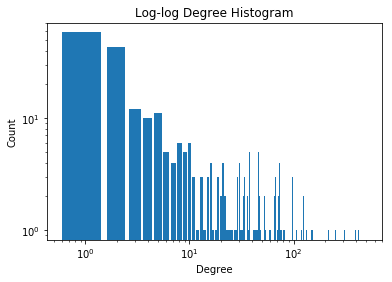

In [18]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)

plt.title("Log-log Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

In [17]:
nx.write_gml(G, 'event_network.gml')

In [109]:
def compute_p(G, weight='weight', p='p'):
    # Undirected
    for node in G:
        k_n = len(G[node])
        if k_n > 1:
            sum_w = sum( G[node][neighbor][weight] for neighbor in G[node] )
            for neighbor in G[node]:
                edge_weight = G[node][neighbor][weight]
                p_ij = float(edge_weight)/sum_w
                G[node][neighbor][p] = (1-p_ij)**(k_n-1)
    return G

def alpha_cut(G, alpha, p='p'):
    C = G.copy()
    for u,v,d in G.edges.data():
        if 'p' in d.keys():
            if d['p'] < alpha:
                C.remove_edge(u,v)
    return C

In [113]:
G_c = compute_p(G)

In [119]:
C = alpha_cut(G, 0.8, 'p')

In [120]:
C.number_of_edges()

1815

In [121]:
C.number_of_nodes()

409

In [123]:
nx.write_gml(C, 'event_network.gml')

In [124]:
nx.__version__

'2.2'